# Analyse du dataset Adults Income
## Description du jeu de données

Le jeu de données présente les profils de diverses personnes, afin de classifier la population en deux catégories : les personnes avce un salaire inférieur à 50 000 dollars par ans, et ceux avec un salaire supérieur à ce montant.

## Imports et constantes
### Import des librairies

In [1]:
#!pip install plotly

In [2]:
# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline 
# plt.style.use('fivethirtyeight') 

# PLOTLY 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN
import seaborn as sns


# SCIKIT-LEARN: SELECTION DE VARIABLES
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# SCIKIT-LEARN: MODELES
from sklearn.dummy import DummyClassifier
from sklearn import linear_model # Classe Modèle linéaire 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # Régression linéaire
from sklearn.linear_model import LogisticRegression # Régression logistique
from sklearn.svm import LinearSVC, SVC # Machines à vecteurs de support

# SCIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # Découpage en données train et test
from sklearn.model_selection import cross_val_score # Validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyper_paramètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
from sklearn.metrics import accuracy_score # Exactitude (accuracy)
from sklearn.metrics import f1_score # F1-score
from sklearn.metrics import confusion_matrix # Matrice de confusion
from sklearn.metrics import plot_confusion_matrix # Graphique de la matrice de confusion
from sklearn.metrics import classification_report # Rapport pour le modèle de classification

## EVALUATION: COURBE ROC
from sklearn.metrics import auc # Aire sous la courbe 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

# SCHIKIT-LEARN: PIPELINE et TRANSFORMATEUR
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

## ARBRES, FORETS, APRRENTISSAGE D'ENSEMBLE
from sklearn.tree import DecisionTreeClassifier # Arbres de décision (classification)
from sklearn.ensemble import RandomForestClassifier # Forêts aléatoires (classification)
from sklearn.ensemble import BaggingClassifier # Classifier Bagging (classification)
from sklearn.ensemble import AdaBoostClassifier # Classifier Adaboost (classification)
from sklearn.ensemble import GradientBoostingClassifier  # Gradient de boosting (classification)

# VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # Séparation des données en train et test set
from sklearn.model_selection import cross_val_score # Validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyperparamètres
from sklearn.model_selection import RandomizedSearchCV # tester arbitrairement plusieurs hyperparamètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
 
# WARNINGS
import warnings
warnings.filterwarnings('ignore')

### Definition des constantes

In [3]:
# Path vers le dataset
_DATASET_PATH_ = "../data/adult.csv"
# Setting du random state pour la reproduction à l'identique des tests
_RANDOM_STATE_ = 7
# Nom de la target
targetName = 'income'

### Import du dataset

In [4]:
dataset = pd.read_csv(_DATASET_PATH_)

## Analyse Exploratoire de la donnée
Avant de travailler sur la donnée, on réalise une copie du dataset de base afin d'éviter une éventuelle altération des données sur la suite de l'étude.

In [5]:
# Copie du dataset
df_data = dataset.copy()

In [6]:
df_data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

On commence par afficher les 5 premières lignes du dataset afin de voir le format du dataset. On remarque qu'il y a 14 features, en plus de la target "income".

In [7]:
# Afficher la taille du dataset
n_samples, n_features = df_data.shape

In [8]:
print(n_samples)

32561


Le dataset comporte 32561 observations.

In [9]:
# Afficher les informations générales du DataFrame
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Le dataset semble contenir à première vue 6 features entières (certaines seront des variables qualitatives d'autres seront quantitatives), ainsi que 8 features catégorielles (chaînes de caractères). La target elle semble être également composée de strings, ce qui signifie que le problème sera probablement un problème de classification et non pas de régression. Il restera à vérifier s'il s'agit d'une classification binaire ou multiclasse.

### Analyse univariée de la target

In [10]:
df_data[targetName].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

La target ne possède que deux valeurs. Il s'agit donc d'un problème de classification binaire. On devra donc par la suite déterminer via des modèles et selon les valeurs des features à laquelle des deux catégorie une entrée correspond.

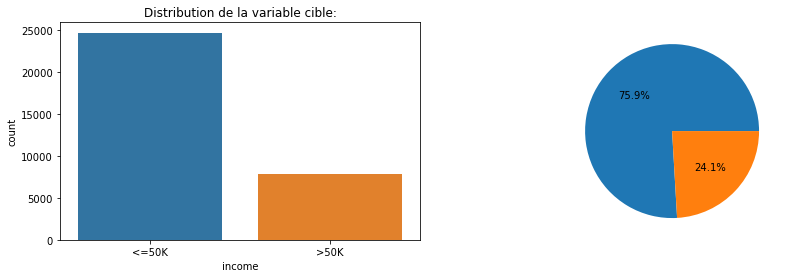

In [11]:
# Graphique en barres et en camembert représentant la répartition des valeurs de la target
plt.figure(figsize=(8, 4))
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x=targetName, data=df_data)
plt.title("Distribution de la variable cible:")
plt.subplot(122)
plt.pie(df_data[targetName].value_counts(), autopct='%1.1f%%')
plt.show()

On remarque que les deux classes ne sont pas équilibrées. La classe ">50K" est 3 fois moins représentée que la classe "<=50K". Ce sera à prendre en compte lors du calcul des métriques des modèles par la suite.

### Analyse univariée des features
On commence par réaliser un premier découpage des données par type, que l'on viendra corriger par la suite.

In [12]:
# Séparer les labels de variables catégoriques et continues
con_features = df_data.select_dtypes(['float64','int64']).columns.drop(labels=targetName,errors='ignore')
cat_features = df_data.select_dtypes('object').columns.drop(labels=targetName,errors='ignore')

#### Correction du découpage par type des features

Le découpage automatique en utilisant le dtype étant rarement bon, nous allons le corriger en regardant le jeu de données de plus près, notamment grâce au fichier _description.txt_.

In [13]:
# Affichage des labels des features continues
con_features

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

D'après la description du dataset sur internet, la features 'fnlwgt' qui paraît à première vue difficile à saisir est un poids assigné à chaque personne par le Census Bureau. Il s'agit donc bien d'une valeur continue.
De même, la variable 'hours.a.week' représente le nombre d'heures travaillées durant la semaine, ce qui représente également une variable quantitative.

In [14]:
# Affichage des labels des features qualitatives
cat_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

Après vérification de la description des données, on constate que les labels selectionnés comme étant qualitatives sont en effet qualitatives.

#### Analyse univariée des variables quantitatives

On commence par afficher la description de chaque colonnes continues afin d'obtenir des statistiques basiques pour chaque colonne.

In [15]:
# Afficher la description statistique des variables catégoriques
df_data[con_features].describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

On remarque que les colonnes "capital.gain" et "capital.loss" ont un Q3 valant 0, alors que la moyenne sur la colonne est de 1077 environ pour la première et de 87 pour la seconde. Les valeurs sont donc probablement très étendues, avec une majorité de valeur autour de 0.

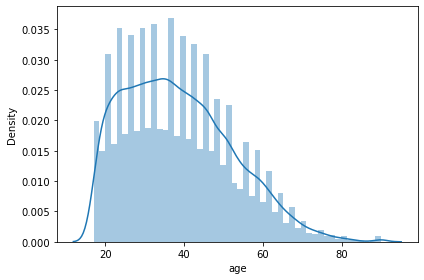

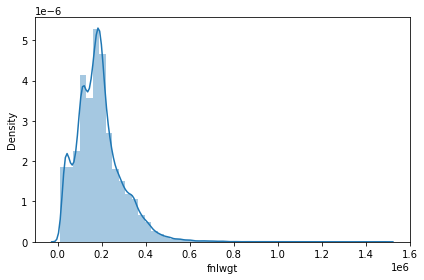

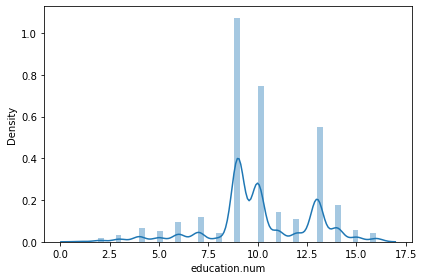

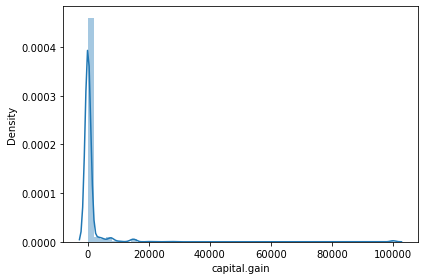

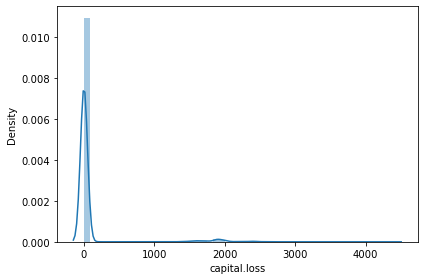

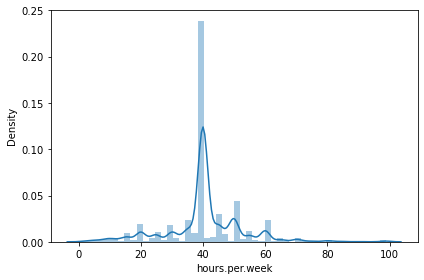

In [16]:
# Afficher l'histogramme de chaque variables continues
for col in con_features:
    plt.figure()
    sns.distplot(df_data[col])
    # plt.hist(df_data[col], bins=20, alpha=1, density=True)
    plt.tight_layout()
    plt.show()

Les histogrammes de répartition des données confirment les suppositions réalisées plus tot :
- "capital.gain" et "capital.loss" sont concentrées autour de 0, mais possèdent des valeurs très hautes en minorité ce qui donne un écrat type élevé.
- "ages" est réparti de manière plutôt normale centrée sur environ 30, sauf qu'au dessous d'environ 18 ans il n'y a aucune valeur
- "hours.per.week" est normale avec un centrage très prononcé sur 40.

#### Analyse univariée des variables qualitatives

In [17]:
# Permet d'afficher les valeurs prises par chaques variables pour voir l'étendue des dictionnaires
for col in cat_features:
    print(f'{col :-<70} {df_data[col].unique()}') # créer un sytème de marge

workclass------------------------------------------------------------- ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education------------------------------------------------------------- ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital.status-------------------------------------------------------- ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation------------------------------------------------------------ ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship---------------------------------------------------------

On remarque que le nombre de classes varie beaucoup selon la target. Certaines classent possèdent beaucoup de classes, comme "native.country" ou "occupation", sans pour autant qu'il y'ait trop de classes par rapport au nombre de lignes, qui reste donc raisonnable.
A l'inverse, certaines classes en possèdent moins, à tel point que "sex" soit binaire (variant entre "Female" et "Male").

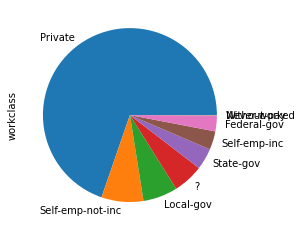

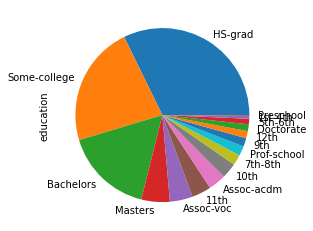

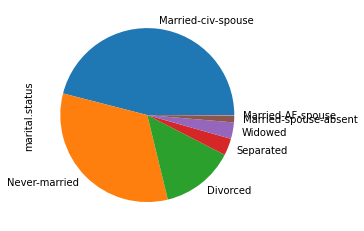

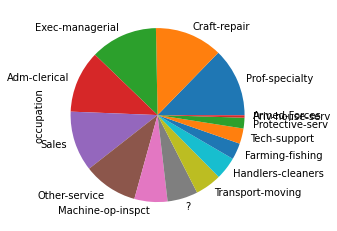

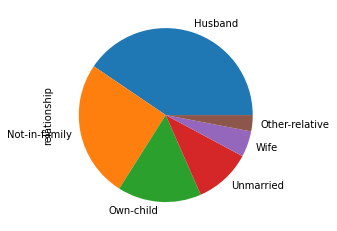

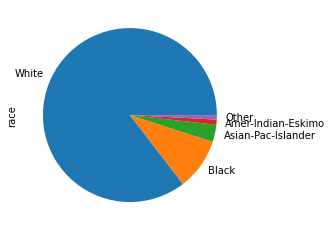

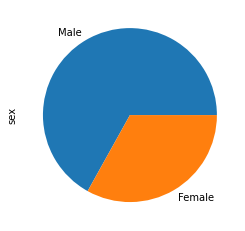

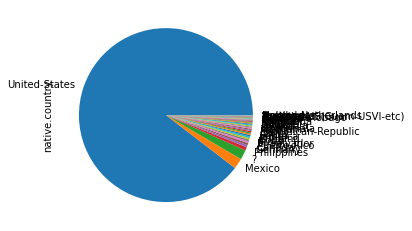

In [18]:
# Permet d'afficher un diagramme en camembert de toutes les variables catégorielles (répartition des valeurs)
for col in cat_features:
    plt.figure()
    df_data[col].value_counts().plot.pie()
    plt.show()

En affichant la répartition des données, on remarque qu'elle n'est que rarement équilibrée. Sur le graphique de la feature "native.country", on remarque que la grande majorité des lignes ont pour valeur "United-States", et que les autres valeurs apparaissent en minorité. De même, pour la feature "race", la valeur "white" ressort en grosse majorité face aux autres catégories également.
A l'inverse, pour la colonne "occupation", les valeurs sont à peu près distribuées de manière équivalente.

### Analyse bivariée

<Figure size 1872x864 with 0 Axes>

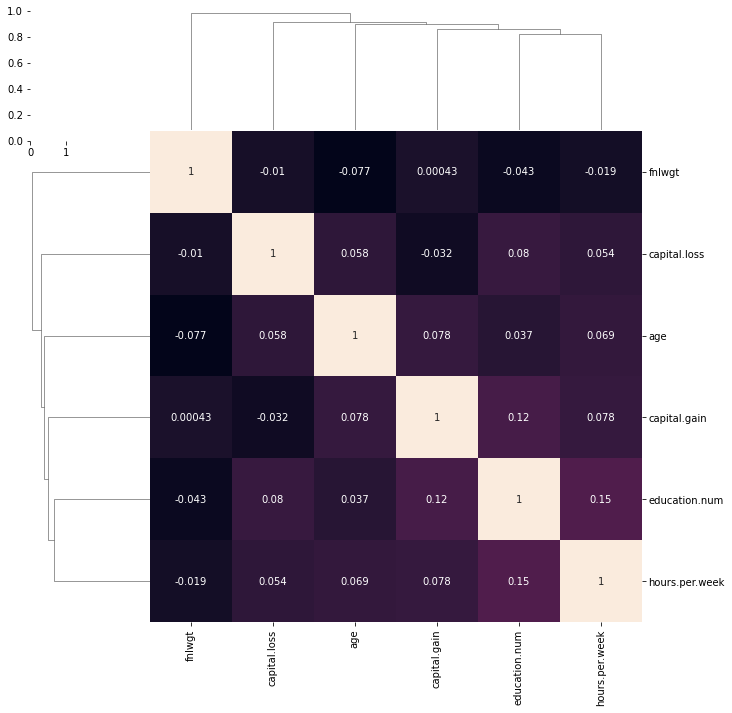

In [19]:
# Permet d'afficher sous forme de heatmap la corrélation linéaire entre les variables
# On peut remplacer par sns.clustermap(df_data[con_features].corr()) pour avoir les clusters
plt.figure(figsize=(26, 12))
sns.clustermap(df_data[con_features].corr(), annot=True, cbar=False)
plt.show()

On remarque qu'il y a peu de corrélation entre les différentes variables, qui s'étende au maximum à 0.15.

<Figure size 432x288 with 0 Axes>

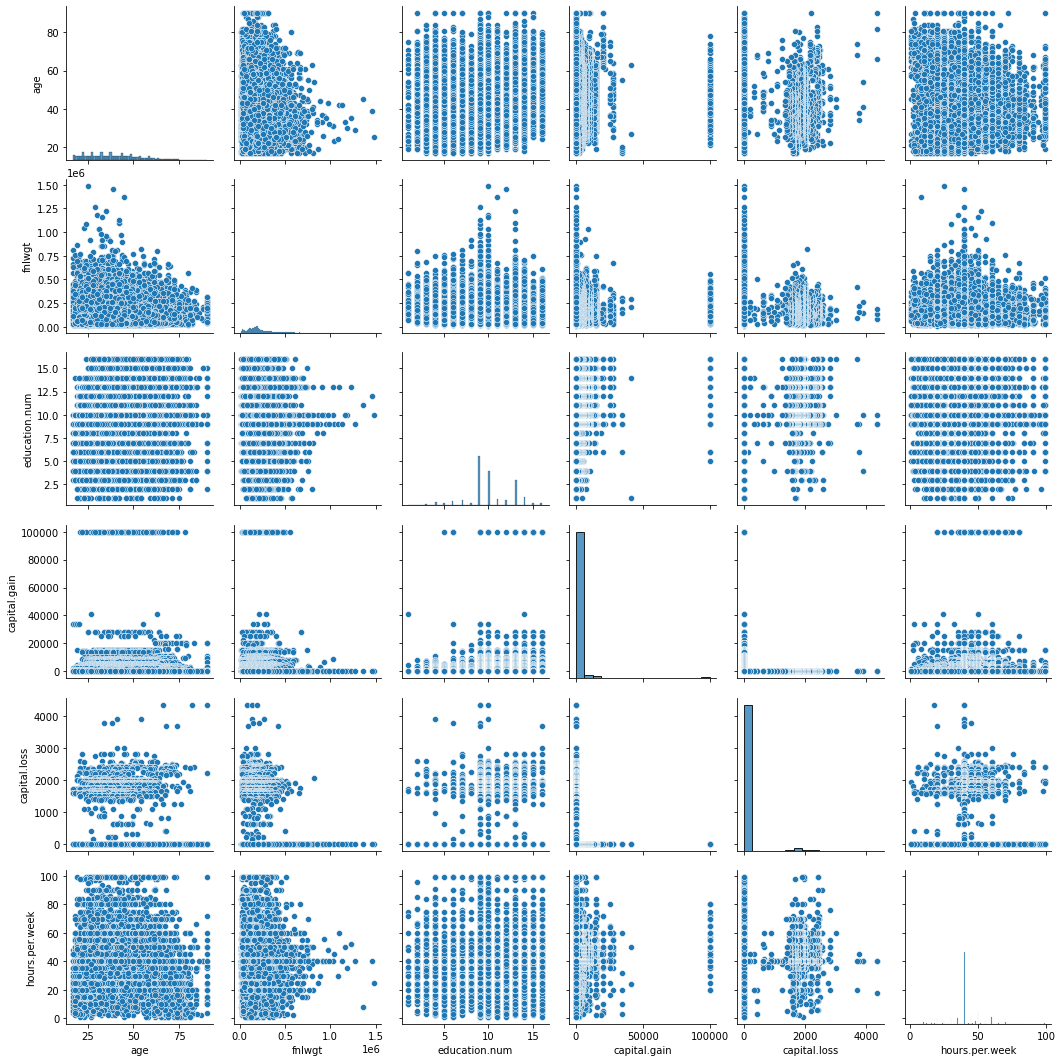

In [20]:
# Afficher le pairplot de relation entre toutes les variables numériques
plt.figure()
sns.pairplot(df_data[con_features])
plt.show()

Comme relevé précédemment, on ne remarque aucune tendance notoire, même différentes de linéaire, entre les différentes variables quantitatives.

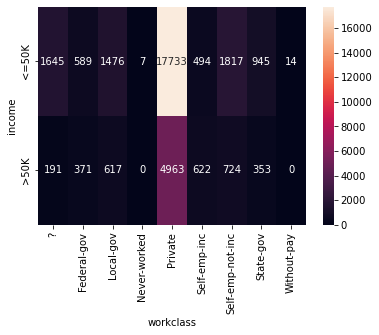

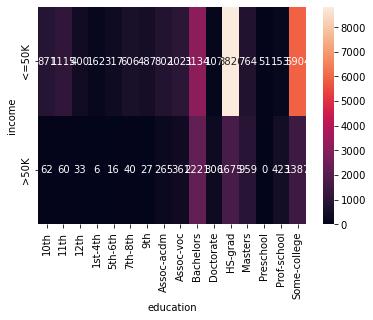

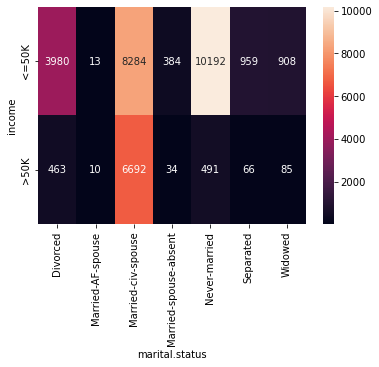

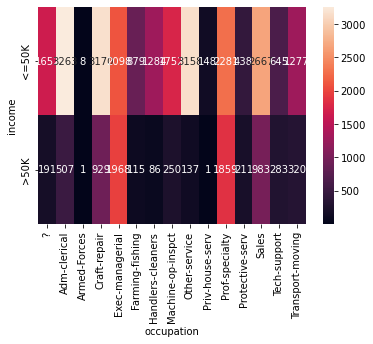

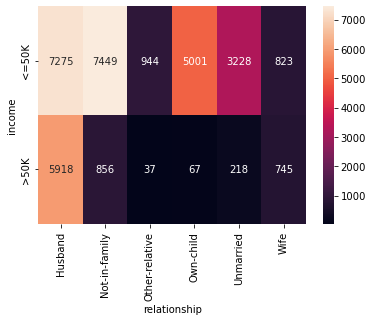

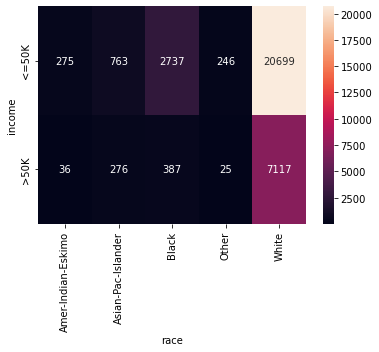

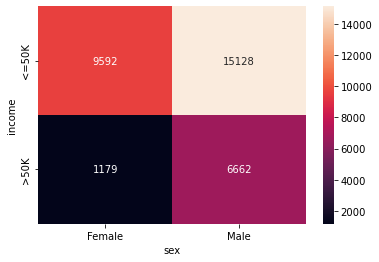

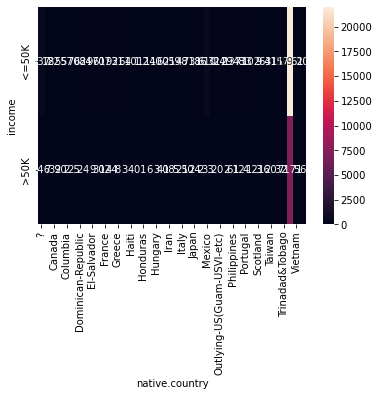

In [21]:
for feature in cat_features:
    plt.figure()
    sns.heatmap(pd.crosstab(df_data[targetName], df_data[feature]), annot=True, fmt='d')
    plt.show()

Ces Heatmaps nous apprennent peu de choses quant à la corrélation entre les features qualitatives et la target :
- Le sexe a une corrélation légère avec la target : le salaire a plus de chances d'être >50K si la personne est un homme que si c'est une femme, car 9/10 des femmes ont un salaire <=50K, alors que 7/10 des hommes sont dans cette tranche.
- La race a une bonne corrélation egalement avec les revenus, car globalement si la personne est blanche, elle a plus de chances d'être classifiés comme ">50K".

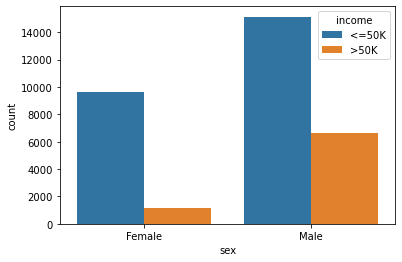

In [22]:
plt.figure()
sns.countplot(x='sex', hue=targetName, data=df_data)
plt.show()

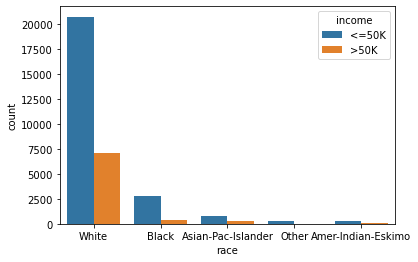

In [23]:
plt.figure()
sns.countplot(x='race', hue=targetName, data=df_data)
plt.show()

En affichant les diagrammes en barre de répartition de la target selon les valeurs prises par "sex" et "race", on remarque que les obervations précédemment réalisées se confirment.

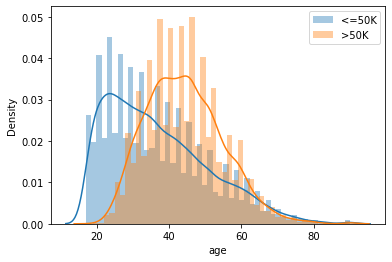

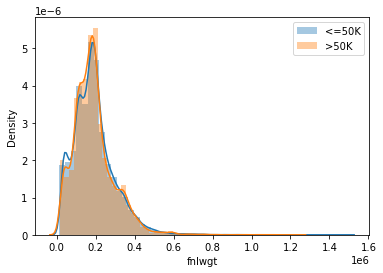

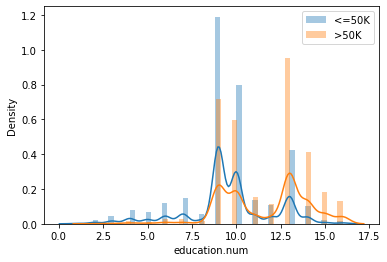

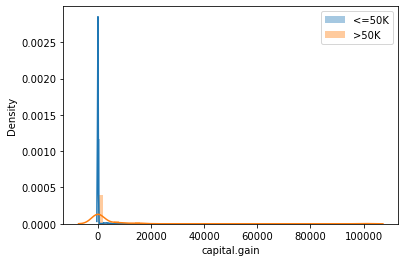

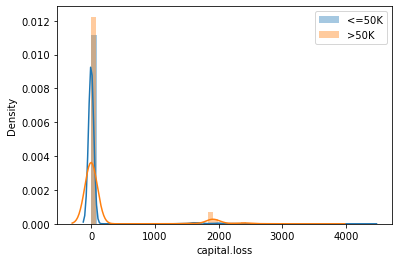

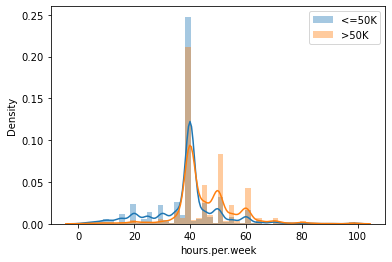

In [24]:
# Permet d'aficher les valeurs de la variable cible selon la répartition de chaque feature continues
# On crée des Series avec chaque valeur de la target
df_data_label1 = df_data[df_data[targetName] == '<=50K']
df_data_label2 = df_data[df_data[targetName] == '>50K']
# Remplacer df_data_label1 et df_data_label2 par les vrais labels
for feature in con_features:
    plt.figure()
    sns.distplot(df_data_label1[feature], label='<=50K')
    sns.distplot(df_data_label2[feature], label='>50K')
    plt.legend()
    plt.show()

Concernant la correlation entre les valeurs prises par les variables continues et celles prises par la target, on remarque sur les graphiques de répartition précédents quelques éléments qui sortent :
- quand la target vaut "<=50K", la variable "age" est généralement plus faible que quand elle vaut ">50K"
- quand "educational.num" vaut moins que 11 (environ), la variable target apparaît plus de fois avec la valeur "<=50K" que  ">50K", mais cela s'inverse lorsqu'on dépasse ce seuil

## Pré-traitements
L'analyse exploratoire étant réalisée, il faut maintenant utiliser les observations et la donnée afin de créer plusieurs protocoles de pré-traitements, ainsi que plusieurs entraînements suivant des modèles différents, afin de déterminer un modèle prédictif de classification binaire qui sera le plus effectif dans le cas de notre dataset.

In [25]:
# Afficher tous les na
df_data.isna().values.any()

False

In [26]:
df_data[df_data == "?"] = np.nan

In [27]:
df_data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

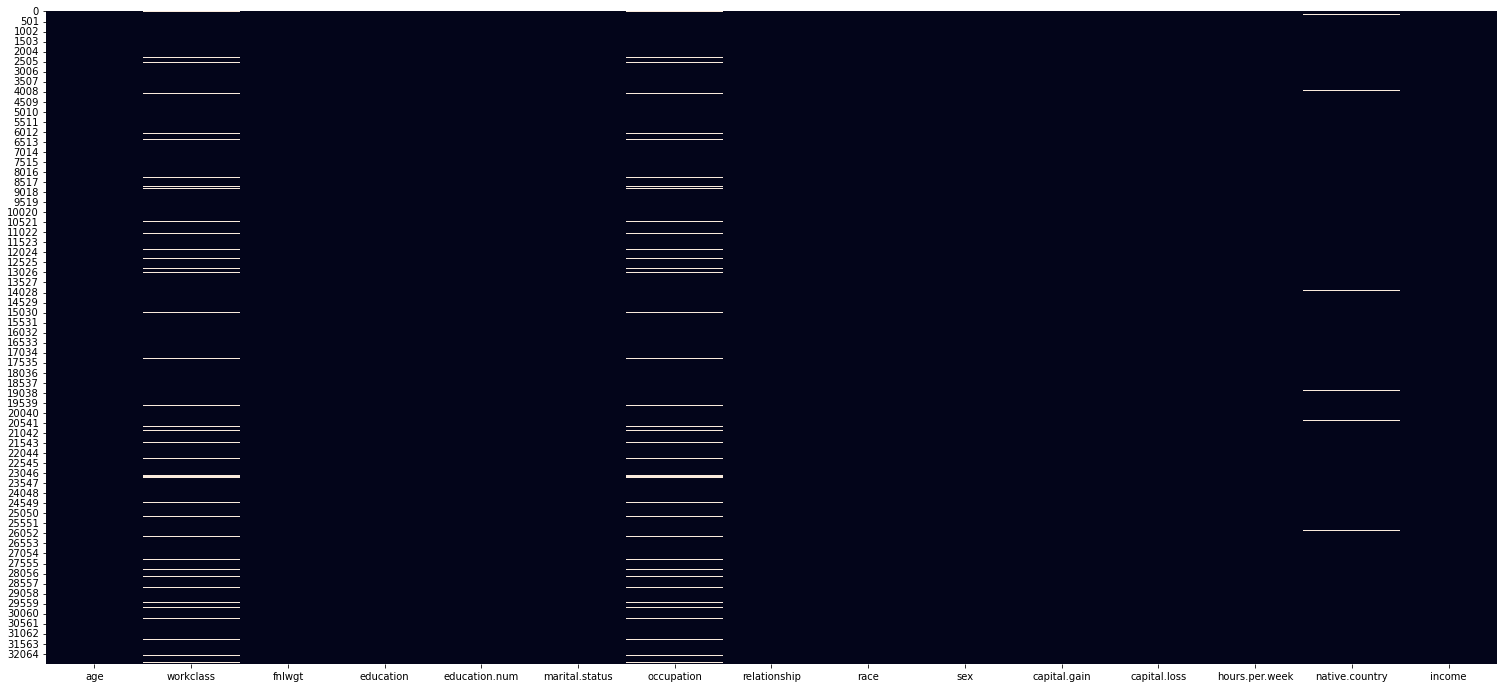

In [28]:
# afficher avec seaborn
plt.figure(figsize=(26, 12))
sns.heatmap(df_data.isna(), cbar=False)
plt.show()

On peut voir qu'il y a quelques valeurs manquantes. Nous tiendrons compte de cela pour notre préprocessing.

Avant d'appliquer le moindre pré-process, on sépare le training set du testing set afin d'éviter de propager une éventuelle erreur de non indépendance des deux sets.

In [29]:
df_train, df_test = train_test_split(df_data, test_size=0.2, random_state=_RANDOM_STATE_, stratify=df_data[targetName])

Comme précisé dans la fonction de splitting utilisée ci-dessus, on passe en paramètre le Random State afin de pouvoir comparer par la suite les différents pré-process pour déterminer le meilleur, en évitant de changer les des paramètres autres que les pré-process eux mêmes. On pourra, lorsqu'on aura trouvé les paramètres optimaux, retirer cette seed.

Il faut maintenant créer des fonctions de prép-processing, par tâches, qui prendront en paramètre des classes de pré-processing. Par exemple, une fonction *scaler()* pourra en paramètre *StandardScaler()*, *MinMaxScaler()* etc. afin de déterminer le meilleur parmis tous ces scalers.

In [30]:
# Peut prendre StandardScaler, MinMaxScaler, RobustScaler
def scaler(scl, df_train, df_test, con_features = []):
    for feature in con_features:
        df_train[feature] = scl.fit_transform(df_train[feature].values.reshape(-1,1)).ravel()
        df_test[feature] = scl.transform(df_test[feature].values.reshape(-1,1)).ravel()
    return df_train, df_test

Une fonction scaler, comme décrite précédemment, pourra prendre en paramètre un scaler parmi StandardScaler, MinMaxScaler et RobustScaler, pour ensuite réaliser une opération de scaling sur les données continues du dataset.

In [31]:
# Peut prendre LabelEncoder, OneHotEncoder
def encoder(ecd, df_train, df_test, cat_features_to_encode = []):
    # Si on a une colonne catégorielle avec deux valeurs par exemple, on peut utiliser l'encoder
    for feature in cat_features_to_encode:
        # The OneHotEncoder feature needs a new shape, instead of the other encoders
        if type(ecd).__name__ != "OneHotEncoder":
            df_train[feature] = ecd.fit_transform(df_train[feature].values.reshape(-1,1)).ravel()
            df_test[feature] = ecd.transform(df_test[feature].values.reshape(-1,1)).ravel()
        else:
            df_train[feature] = ecd.fit_transform(df_train[feature].values.reshape(-1,1)).toarray()
            df_test[feature] = ecd.transform(df_test[feature].values.reshape(-1,1)).toarray()
    return df_train, df_test

Une fonction encoder pourra prendre en paramètre un encodeur parmi LabelEncoder et OneHotEncoder, pour ensuite réaliser une opération d'encodage sur les données catégoriques du dataset afin de permettre leur lecture par les algorithmes de classification.

In [32]:
# Peut prendre KNNImputer, SimpleImputer, ne sera pas utilisé par pas de valeurs manquantes
def imputer(imp, df_train, df_test, cat_features_to_impute = [], cont_features_to_impute = []):
    # Application de l'imputer sur les variables continues
    for feature in cont_features_to_impute :
        df_train[feature] = imp.fit_transform(df_train[feature].values.reshape(-1,1)).ravel()
        df_test[feature] = imp.transform(df_test[feature].values.reshape(-1,1)).ravel()
    # Application de l'imputer sur les variables catégories 
    for feature in cat_features_to_impute :
        df_train[feature] = imp.fit_transform(df_train[feature].values.reshape(-1,1)).ravel()
        df_test[feature] = imp.transform(df_test[feature].values.reshape(-1,1)).ravel()
    return df_train, df_test

Une fonction imputer pourra prendre en paramètre un imputer parmi KNNImputer et SimpleImputer, pour remplacer les valeurs manquantes des variables continues (KNN et Simple) ainsi que les valeurs catégoriques (Simple seulement).

In [33]:
# Peut prendre SMOT
def oversampling(ovs, df_train, targetName):
    # Suréchantillonage
    y_train = df_train[targetName]
    X_train = df_train.drop(targetName, axis = 1)
    X_train_up, y_train_up = ovs.fit_resample(X_train, y_train)
    # On reconstruit le dataframe
    df_train_up = X_train_up
    df_train_up[targetName] = y_train_up
    return df_train_up

Le dataset étant déséquilibré (75-25), il sera utile de tester en réalisant une opération d'oversampling sur la target afin de rééquilibrer les classes. La fonction oversampling permettra de réaliser cette opération lors des tests.

In [34]:
def preprocessing(df_train, df_test, targetName, scl = None, imp = None, ecd = None, ovs = None):
    # Deep Copy des dataframe pour garder l'originale intacte
    df_train_tmp = df_train.copy()
    df_test_tmp = df_test.copy()
    # Application des pré-traitements
    df_train_tmp, df_test_tmp = [df_train_tmp, df_test_tmp] if scl is None else scaler(scl, df_train_tmp, df_test_tmp, con_features)
    df_train_tmp, df_test_tmp = [df_train_tmp, df_test_tmp] if ecd is None else encoder(ecd, df_train_tmp, df_test_tmp, cat_features)
    df_train_tmp, df_test_tmp = [df_train_tmp, df_test_tmp] if imp is None else imputer(imp, df_train_tmp, df_test_tmp, cat_features, con_features)
    df_train_tmp = df_train_tmp if ovs is None else oversampling(ovs, df_train_tmp, targetName)
    return df_train_tmp, df_test_tmp

La fonction de pré-processing prend en paramètre les différents préprocess à appliquer, par catégorie, puis performe un à un les traitements sur une copie du dataset fourni en entrée avant de retourner une nouvelle version pré traitée des training et testing sets. Comme vu précédemment, nous devons imputer les valeurs manquantes (imputer et non supprimer car le nombre de valeur manquantes est négligeable). Pour cela, nous allons employer le KNNImputer.

In [35]:
df_train1, df_test1 = preprocessing(df_train, df_test, targetName, scl = MinMaxScaler(), imp = KNNImputer(n_neighbors=5), ecd = LabelEncoder(), ovs = None)

In [36]:
df_train2, df_test2 = preprocessing(df_train, df_test, targetName, scl = StandardScaler(), imp = KNNImputer(n_neighbors=5), ecd = LabelEncoder(), ovs = None)

Un premier pré traitement sera un MinMaxScaler (simple), ainsi qu'un LabelEncoder. On ne fera sur ce set aucun oversampling du training set afin de rééquilibrer les classes, car on voudra ici tester une suite très simple de pré-traitements. On pourra le comparer avec une seconde version qui remplace le MinMaxScaler par un StandardScaler.

In [37]:
df_train3, df_test3 = preprocessing(df_train, df_test, targetName, scl = StandardScaler(), imp = KNNImputer(n_neighbors=5), ecd = OneHotEncoder(), ovs = SMOTE(random_state=_RANDOM_STATE_))

In [38]:
df_train4, df_test4 = preprocessing(df_train, df_test, targetName, scl = StandardScaler(), imp = KNNImputer(n_neighbors=5), ecd = LabelEncoder(), ovs = RandomUnderSampler(random_state=0))

In [39]:
df_train1.head()

age  workclass    fnlwgt  education  education.num  \
4002   0.013699        3.0  0.033072       15.0       0.600000   
27352  0.356164        3.0  0.154996       11.0       0.533333   
8796   0.082192        3.0  0.154762        7.0       0.733333   
17819  0.191781        3.0  0.150841       11.0       0.533333   
9860   0.260274        3.0  0.104603       11.0       0.533333   

       marital.status  occupation  relationship  race  sex  capital.gain  \
4002              4.0        11.0           3.0   4.0  0.0       0.02176   
27352             2.0         5.0           0.0   4.0  1.0       0.00000   
8796              4.0         9.0           3.0   4.0  1.0       0.00000   
17819             0.0         3.0           4.0   2.0  0.0       0.00000   
9860              2.0        13.0           0.0   4.0  1.0       0.00000   

       capital.loss  hours.per.week  native.country income  
4002            0.0        0.346939            38.0  <=50K  
27352           0.0        0.397959            38.0  <=50K  
8796            0.0        0.397959            38.0  <=50K  
17819           0.0        0.397959            38.0  <=50K  
9860            0.0        0.326531            38.0  <=50K

Un second pré traitement sera un StandardScaler, ainsi qu'un OneHotEncoder. On utilisera également SMOTE pour oversampler la classe minoritaire de la target. Un second pré traitement identique remplacera simplement le OneHotEncoder par un LabelEncoder afin de comparer les performances de ces deux pré-process. Il est intéréssant de noter que si on utilise une réduction de la dimension par la suite, cet oversampling ne sera alors plus utile, voir contre productif, car propagerait de l'information artificiellement créée.

(39550, 15)


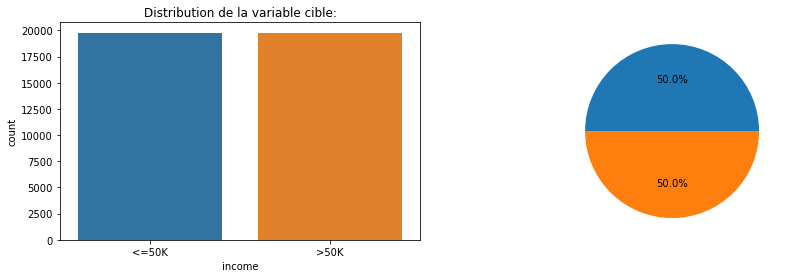

In [40]:
# Dimensions du dataframe
print(df_train3.shape)

# Graphique en barres et en camembert représentant la répartition des valeurs de la target
plt.figure(figsize=(8, 4))
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x=targetName, data=df_train3)
plt.title("Distribution de la variable cible:")
plt.subplot(122)
plt.pie(df_train3[targetName].value_counts(), autopct='%1.1f%%')
plt.show()

On remarque que le SMOTE a bien été appliqué, car le nombre de samples résultant du pré traitement a nettement augmenter. On opeut également le vérifier avec sur le diagramme ci-dessus.

## Modélisations
Maintenant que les données sont pré-traités, elles sont aptes à être utilisées afin de créer des modèles répondants à notre problématique de départ. Pour améliorer au maximum nos résultats, on créera plusieurs modélisations, puis on déterminera les performances de chaque modèles. Il faudra également utiliser chaque pré-process sur chaque modèle, afin de déterminer la meilleure chaîne de traitement de la donnée.

In [41]:
def testModel(df_train, df_test, targetName, model, showMetrics = False):
    # On sépare la target des features
    y_train =  df_train[targetName]
    y_test =  df_test[targetName]
    X_train = df_train.drop(targetName, axis=1)
    X_test = df_test.drop(targetName, axis=1)
    # Fitting du modèle
    model.fit(X_train, y_train)
    # Obtention des résultats du modèle sur le testing set et sur le training set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # Obtention des métriques et affichage
    toReturn = classification_report(y_test, y_pred_test, output_dict = True)['macro avg']['f1-score']
    if showMetrics:
        print('='*20)
        print(type(model).__name__)
        print('='*20, '\n')
        print("Matrice de confusion:")
        print(confusion_matrix(y_test, y_pred_test), '\n') # afficher à l'écran notre matrice de confusion
        print("Rapport de classification:")
        print(classification_report(y_test, y_pred_test), '\n')
        print('Exactitude: %f' %(accuracy_score(y_test,y_pred_test)*100), '\n')
        plot_confusion_matrix(model, X_test, y_test)


    return toReturn

La fonction testModel permet d'appliquer un modèle instantié passé en paramètre aux données d'un jeu de données pré traité passé également en paramètre. Il sera alors très simple de boucler sur tous les modèles et les pré traitements afin de les comparer et ainsi d'obtenir la meilleure chaîne de pré-traitements et le meilleur modèle.

La fonction renverra un élément du classification report : le f1-score équilibré en utilisant l'approche macro average. Cette approche est calculée en donnant un même coefficiant aux deux classes de la target, à savoir 0.5 dans le cadre d'une classification binaire : $$ f1~score = 0.5 * f1~score~_{class~0} + 0.5 * f1~score~_{class~1} $$

Nous avons privilégié cette approche, afin de donner le même poids aux deux classes de la target. En effet, le dataset étant un peu déséquilibré, l'approche weighted donnerait quant à elle un poids bien plus important à la classe majoritaire, qui aurait également de meilleurs résultats théoriques face à la classe sous représentée de par le nombre de samples présents lors de l'entraînement.

Nous avons choisi de sortir comme score principal le score f1, qui permet de réaliser la moyenne harmonique de la précision et du rappel. Cette métrique, qui sera plus impactée par le facteur le plus faible entre ses deux composantes, permettra de bien représenter les capacités du modèle, même si l'information du bruit ou du silence des modèles vu qu'on ne conserve pas la précision et le recall.

LogisticRegression

Matrice de confusion:
[[4646  299]
 [ 899  669]] 

Rapport de classification:
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4945
        >50K       0.69      0.43      0.53      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.68      0.71      6513
weighted avg       0.80      0.82      0.80      6513
 

Exactitude: 81.606019 



0.7066992599230753

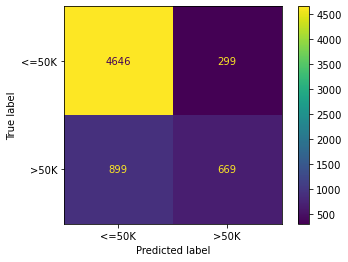

In [42]:
testModel(df_train1, df_test1, targetName, LogisticRegression(penalty='none', random_state=_RANDOM_STATE_), showMetrics = True)

LogisticRegression

Matrice de confusion:
[[3944 1001]
 [ 345 1223]] 

Rapport de classification:
              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.85      4945
        >50K       0.55      0.78      0.65      1568

    accuracy                           0.79      6513
   macro avg       0.73      0.79      0.75      6513
weighted avg       0.83      0.79      0.80      6513
 

Exactitude: 79.333640 



0.7496382727016009

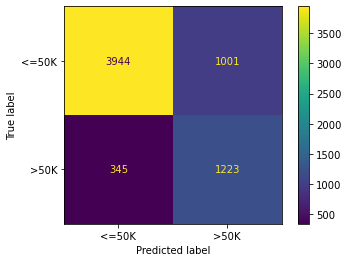

In [43]:
testModel(df_train3, df_test3, targetName, LogisticRegression(penalty='none', random_state=_RANDOM_STATE_), showMetrics = True)

On remarque ici que le choix du score f1 en approche macro semble en effet être la métrique la plus représentative des capacités du modèle. Sans oversampling, ce modèle donne de meilleurs résultats sur la classe la plus représentée. A l'inverse la classe sous représentée obtient des résultats bien moins bons. Lors de l'oversampling de la classe minoraitire, les résultats de la classe précédemment sur représentée baissent légèrement, mais ceux de la classe qui a été oversamplée augmentent drastiquement. Le f1 score macro permet de montrer cette amélioration, sans être impactée par la taille de chaque classe.

In [44]:
def getBestChain(l_preprocess, l_models):
    chosen = None
    tableResult = []
    for p in l_preprocess:
        df_train = l_preprocess[p]["train"]
        df_test = l_preprocess[p]["test"]
        targetName = l_preprocess[p]["target"]
        for m in l_models:
            result = {"model": m, "preprocess": p}
            result["score"] = testModel(df_train, df_test, targetName, l_models[m], showMetrics = False)
            tableResult.append(result)
    tableResult = sorted(tableResult, key=lambda d: d['score'], reverse=True)
    print(tableResult)
    return tableResult[0]

La fonction getBestChain va itérer sur tous les préprocess et tous les modèles afin de trouver la meilleure chaîne de traitement, en utilisant le score f1 en macro average comme expliqué précedemment.

In [45]:
# Pré-traitements à tester
l_preprocess = {"1": {"train": df_train1, "test": df_test1, "target": targetName},
                "2": {"train": df_train2, "test": df_test2, "target": targetName},
                "3": {"train": df_train3, "test": df_test3, "target": targetName},
                "4": {"train": df_train4, "test": df_test4, "target": targetName}}
# Modèles à tester
l_models = {"LogNoPenalty": LogisticRegression(penalty='none', random_state=_RANDOM_STATE_),
            "LogRidge": LogisticRegression(penalty='l2', random_state=_RANDOM_STATE_),
            "LogLasso": LogisticRegression(penalty='l1', solver='saga', random_state=_RANDOM_STATE_),
            "LogElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=_RANDOM_STATE_),
            "LinearSVC": LinearSVC(C=8e-2, random_state=_RANDOM_STATE_),
            "RandomForest" : RandomForestClassifier(random_state=0) ,
            "GradientBoost" : GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
            "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
            }
bestResult = getBestChain(l_preprocess, l_models)

[{'model': 'GradientBoost', 'preprocess': '1', 'score': 0.8042283588564063}, {'model': 'GradientBoost', 'preprocess': '2', 'score': 0.8042283588564063}, {'model': 'RandomForest', 'preprocess': '1', 'score': 0.7960034385810284}, {'model': 'RandomForest', 'preprocess': '2', 'score': 0.7958312799789736}, {'model': 'GradientBoost', 'preprocess': '4', 'score': 0.7919475495909208}, {'model': 'RandomForest', 'preprocess': '4', 'score': 0.775862901991447}, {'model': 'GradientBoost', 'preprocess': '3', 'score': 0.7664824535517746}, {'model': 'RandomForest', 'preprocess': '3', 'score': 0.7655887766227952}, {'model': 'DecisionTreeClassifier', 'preprocess': '2', 'score': 0.7520066516156199}, {'model': 'DecisionTreeClassifier', 'preprocess': '1', 'score': 0.7515922934729558}, {'model': 'LogNoPenalty', 'preprocess': '3', 'score': 0.7496382727016009}, {'model': 'LogRidge', 'preprocess': '3', 'score': 0.7494911947821592}, {'model': 'LogLasso', 'preprocess': '3', 'score': 0.7494911947821592}, {'model':

A la suite de nos tests croisés, nous observons que le meilleur résultat est obtenu avec le Gradient Boosting fitté sur nos données sans oversampling avec la méthode de normalisation MinMaxScaler.
Nous allons donc retenir cette préparation de données et ce modèle pour la suite de notre étude.

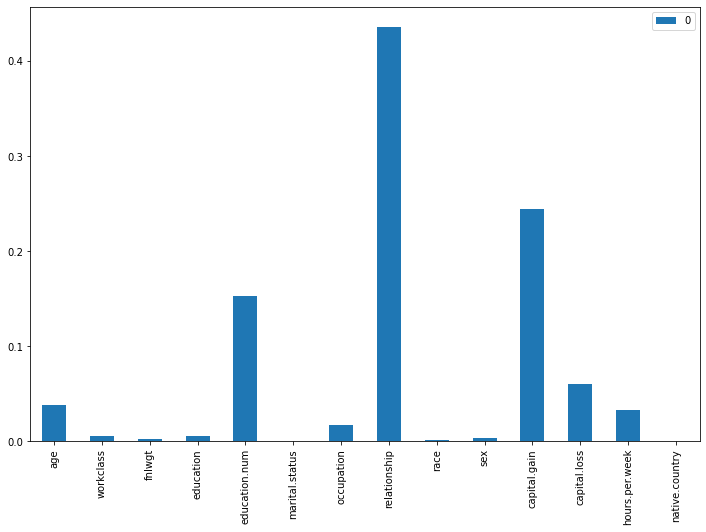

In [46]:
grd_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
y_train =  df_train1[targetName]
X_train = df_train1.drop(targetName, axis=1)
# Fitting du modèle
grd_boost.fit(X_train, y_train)
df1_important_features = pd.DataFrame(grd_boost.feature_importances_, index=X_train.columns)
df1_important_features.plot.bar(figsize=(12,8))
plt.show()

Pour le modèle que nous avons retenu (Gradient Boost), on peut voir qu'il existe une forte disparité dans les variables. La variable la plus déterminante est la situation familiale. Les deux autres variables les plus importantes sont respectivement le capital accumulé et le niveau d'études. Le nombre d'heures de travail hebdomadaire, le capital perdu et l'âge jouent également un rôle non négligeable. 

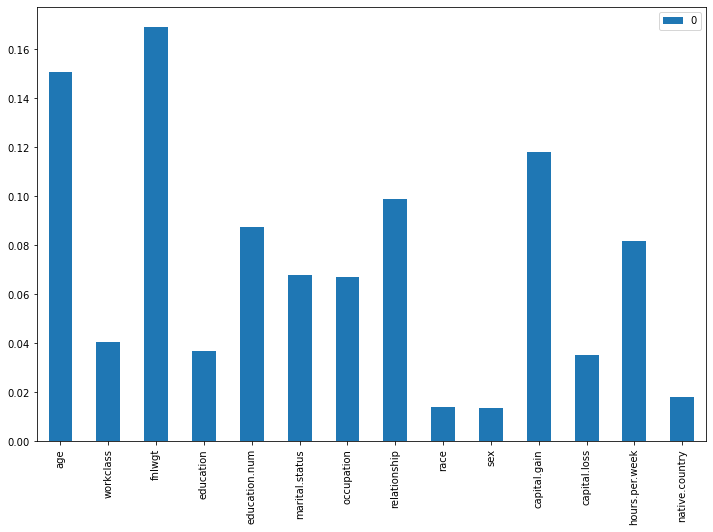

In [47]:
randforest_clf = RandomForestClassifier(random_state=0)
randforest_clf.fit(X_train, y_train)
pd.DataFrame(randforest_clf.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))
plt.show()

A titre de comparaison, sur notre second meilleur modèle (RandomForest) on remarque que les variables ont chacune un rôle bien plus équilibré avec toutefois l'âge et le poids attribué par la SCP qui ont une importance toute particulière.

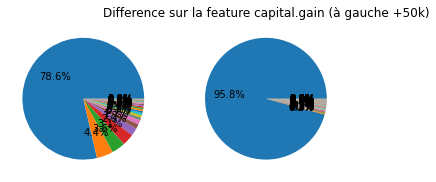

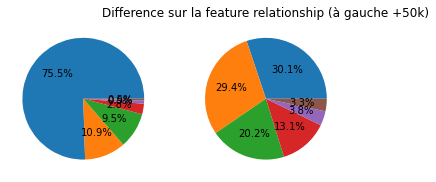

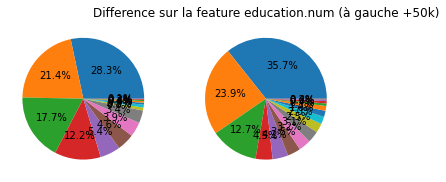

In [48]:
df_data_c1= df_data[df_data[targetName] == '>50K']
df_data_c2= df_data[df_data[targetName] == '<=50K']

imp_features = ['capital.gain', 'relationship', 'education.num']

for col in imp_features:
    plt.figure()
    plt.subplot(121)
    plt.pie(df_data_c1[col].value_counts(), autopct='%1.1f%%')
    plt.subplot(122)
    plt.pie(df_data_c2[col].value_counts(), autopct='%1.1f%%')
    plt.title("Difference sur la feature " + col + " (à gauche +50k)")

    plt.show()


A l'aide de ces comparaisons visuelles, on se rend compte à quel point la feature relationship est en fait décisive. Or, nous n'avions pas fait l'hypothèse qu'il s'agirait de la feature la plus déterminante. 

In [51]:
def evaluation(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # vérifier le modèle est en situation en underfitting/overfitting
    N, train_score, val_score = learning_curve(model, 
                                              X_train, 
                                              y_train, 
                                              cv=5, 
                                              scoring='f1_macro',
                                              train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(8,4))
    plt.plot(N, train_score.mean(axis=1), label='Train Score')
    plt.plot(N, val_score.mean(axis=1), label='Validation Score')
    plt.legend()
    plt.show()
    

Une fonction d'évaluation nous permet de suivre la courbe d'apprentissage ainsi que la matrice de confusion. Cela nous permettra de déterminer s'il y'a overfitting ou non lors de l'entrapînement du modèle gradient boost.

[[4679  266]
 [ 596  972]]
              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      4945
        >50K       0.79      0.62      0.69      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



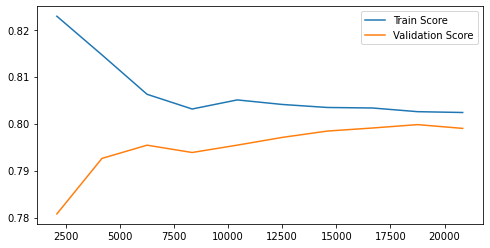

In [52]:
grd_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
y1_train =  df_train1[targetName]
X1_train = df_train1.drop(targetName, axis=1)
y1_test =  df_test1[targetName]
X1_test = df_test1.drop(targetName, axis=1)
evaluation(grd_boost, X1_train, y1_train, X1_test, y1_test)


La courbe démontre qu'il n'y a pas d'overfitting, les deux courbes convergent et celle de vlidation étant globalement croissante, même si on dénote une légère réduction du score f1 macro lorsqu'on approche des 20 000 lignes apprises.